# Mariprism Plotting Features


### Here we show the plotting functions available on Mariprism!

In [51]:
# Import general
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

# Import local
sys.path.append( '../mariprism' )
from _maricolors_dict import FLOWER_BLOSSOM, FLOWER_RAD, ICY_FLOWER
from _maricolors_dict import GAS_FILAMENTS, FOREST_TROPICAL, SUCULENT_GARDEN 
from _maricolors_dict import mari_BLUES, mari_PURPLES
from _marigradients import make_gradient

# import galaxy shapes
sys.path.append( '../galaxy_shapes' )

import _mariplotting as mariplt

### 1. Radial plot example

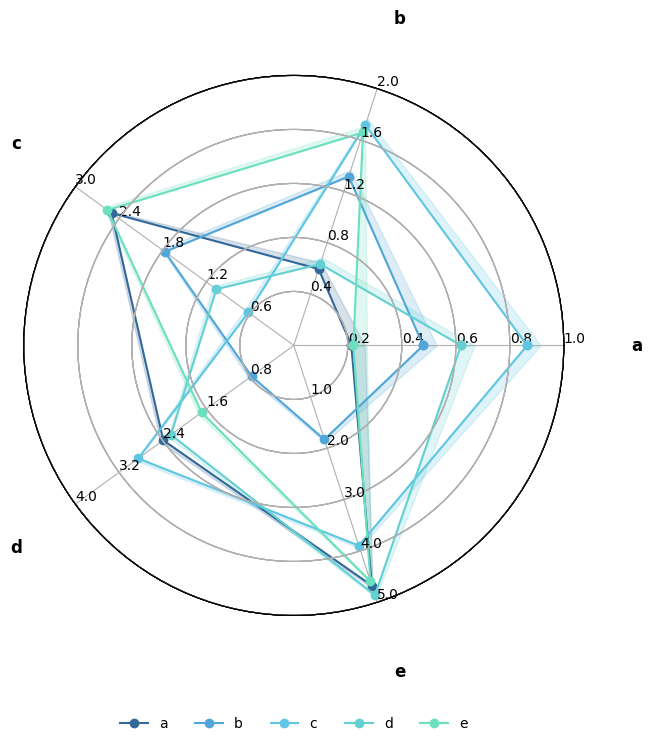

In [14]:
names_param   = ['a','b','c','d','e']      
ranges = [(0,1),(0,2),(0,3),(0,4),(0,5)]
angles = np.linspace(0,360,len(names_param))

marimap_dict = mari_BLUES
marimap_keys = list(marimap_dict.keys())

fig1 = plt.figure(figsize=(6, 6))
radar = mariplt.plot_radar(fig1, names_param, ranges)

for i in range(len(names_param)):

    val1 = np.random.random()
    val2 = np.random.random()*2
    val3 = np.random.random()*3
    val4 = np.random.random()*4
    val5 = np.random.random()*5
    val_array = np.array([val1, val2, val3, val4, val5])

    maricolor_i = marimap_dict[str(marimap_keys[i+1])]
    
    radar.plot(val_array, 'o-', color=maricolor_i, label=names_param[i])
    radar.fill_between(val_array,val_array+0.05, color=maricolor_i, alpha=0.2)
    
radar.ax.legend(loc='center', bbox_to_anchor=(0.5, -0.20),frameon=False, ncol=len(names_param))
plt.show()

In [67]:
#ra_sp #+ ra_el

### 2. Galaxies type plot

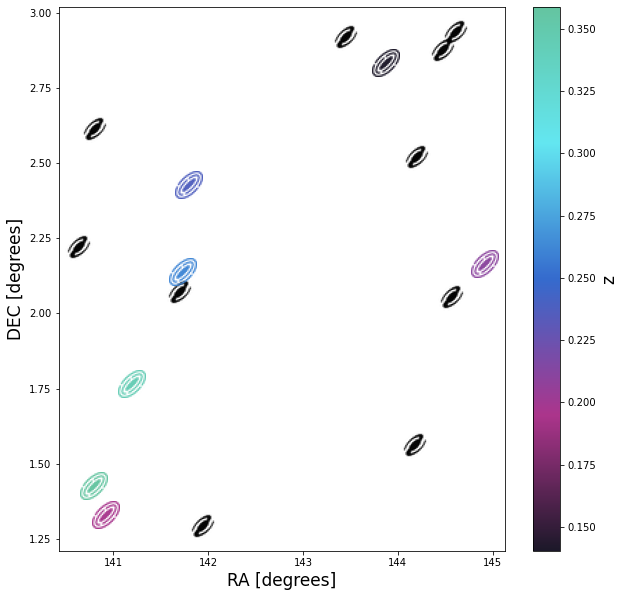

In [77]:
path = '../galaxy_shapes/spiral_bw_1.png'
path2 = '../galaxy_shapes/elliptical_bw.png'

spiral_image = plt.imread(path)
elliptical_image = plt.imread(path2)

ra_sp = [random.uniform(140, 145) for i in range(10)]
dec_sp = [random.uniform(1, 3) for i in range(10)]
z_sp = [random.uniform(0.02, 0.1) for i in range(10)]

ra_el = [random.uniform(140, 145) for i in range(7)]
dec_el = [random.uniform(1, 3) for i in range(7)]
z_el = [random.uniform(0.1, 0.4) for i in range(7)]


fig, ax = plt.subplots(figsize=(10,10))

def plot_images(x, y, image, ax=None, color=None):
    """
    source : https://stackoverflow.com/questions/2318288/how-to-use-custom-png-image-marker-with-plot
    
    """
    ax = ax or plt.gca()
    
    for xi, yi in zip(x,y):
        #image = change_color(image, FLOWER_BLOSSOM['pinky'])
        im = OffsetImage(image, zoom=100/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)

def plot_images_color_coded(x, y, z, image, ax=None):
    """
    source : https://stackoverflow.com/questions/2318288/how-to-use-custom-png-image-marker-with-plot
    
    """
    ax = ax or plt.gca()
    norm = matplotlib.colors.Normalize(vmin=min(z),vmax=max(z))
    colormarip = make_gradient(ICY_FLOWER, name='icy_flower')

    s_m = matplotlib.cm.ScalarMappable(cmap=colormarip, norm=norm)
    s_m.set_array([])
    i = 0 
    #plt.colorbar()
    for xi, yi in zip(x,y):
        #print(s_m.to_rgba(z))
        image = change_color(image, s_m.to_rgba(z[i])[0:3])
        im = OffsetImage(image, zoom=100/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)

        ax.add_artist(ab)    
        i+=1
    cb = plt.colorbar(s_m)
    cb.set_label('z', fontsize=17)

def change_color(image, color):
    """
    changes color of the image 
    
    input:
    ------
    image 
    color
    
    output:
    ------
    new_image
    
    """
    size_x, size_y, rgb = image.shape
    new_image = image
    if rgb != 4:
        return None
    for i in range(size_y):
        new_image[i][0:size_x, 0:3] = color
    return new_image 

#spiral_image = change_color(spiral_image,FLOWER_BLOSSOM['pinky'])

plot_images(ra_sp,dec_sp,spiral_image, ax=ax)
ax.plot(ra_sp, dec_sp, linestyle='')

ax.plot(ra_el, dec_el, linestyle='')
plot_images_color_coded(ra_el,dec_el, z_el, elliptical_image, ax=ax)

plt.xlabel('RA [degrees]', fontsize=17)
plt.ylabel('DEC [degrees]', fontsize=17)

plt.show()